In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [63]:
(xtrain,ytrain), (xtest,ytest)=mnist.load_data()

In [64]:
print(xtrain)
print(len(xtest))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
10000


In [65]:
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.

In [66]:
xtrain=xtrain.reshape((len(xtrain),28*28))
xtest=xtest.reshape((len(xtest),28*28))

In [67]:
inputdim=28*28

In [68]:
codedim=2

In [69]:
inputvec=Input(shape=(inputdim,))

In [70]:
enc1=Dense(392,activation='sigmoid') (inputvec)
enc2=Dense(196,activation='sigmoid') (enc1)
enc3=Dense(98,activation='sigmoid') (enc2)

In [71]:
encode=Dense(codedim,activation='tanh') (enc3)

In [72]:
dc1=Dense(98,activation='sigmoid') (encode)
dc2=Dense(196,activation='sigmoid') (dc1)
dc3=Dense(392,activation='sigmoid') (dc2)
decoderout=Dense(inputdim,activation='sigmoid') (dc3)

In [73]:
latentvec=Model(inputvec,encode)
autoencoder=Model(inputvec,decoderout)

In [74]:
print(autoencoder.summary())

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 196)                 │          77,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 98)                  │          19,306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 2)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 98)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 196)                 │          19,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 392)                 │          77,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 784)                 │         308,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 809,286 (3.09 MB)

 Trainable params: 809,286 (3.09 MB)

 Non-trainable params: 0 (0.00 B)

None


In [75]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [76]:
hist=autoencoder.fit(xtrain,xtrain,epochs=100,batch_size=500,shuffle=True,validation_data=(xtest,xtest))

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.3409 - val_loss: 0.2630
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.2628 - val_loss: 0.2630
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.2632 - val_loss: 0.2624
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.2599 - val_loss: 0.2432
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.2423 - val_loss: 0.2383
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.2380 - val_loss: 0.2353
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.2357 - val_loss: 0.2323
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.2325 - val_loss: 0.2299
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.2301 - val_loss: 0.2271
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.2272 - val_loss: 0.2246
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.2246 - val_loss: 0.2214
Epoch 12/100
120/120 ━━━━

In [77]:
encd=latentvec.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


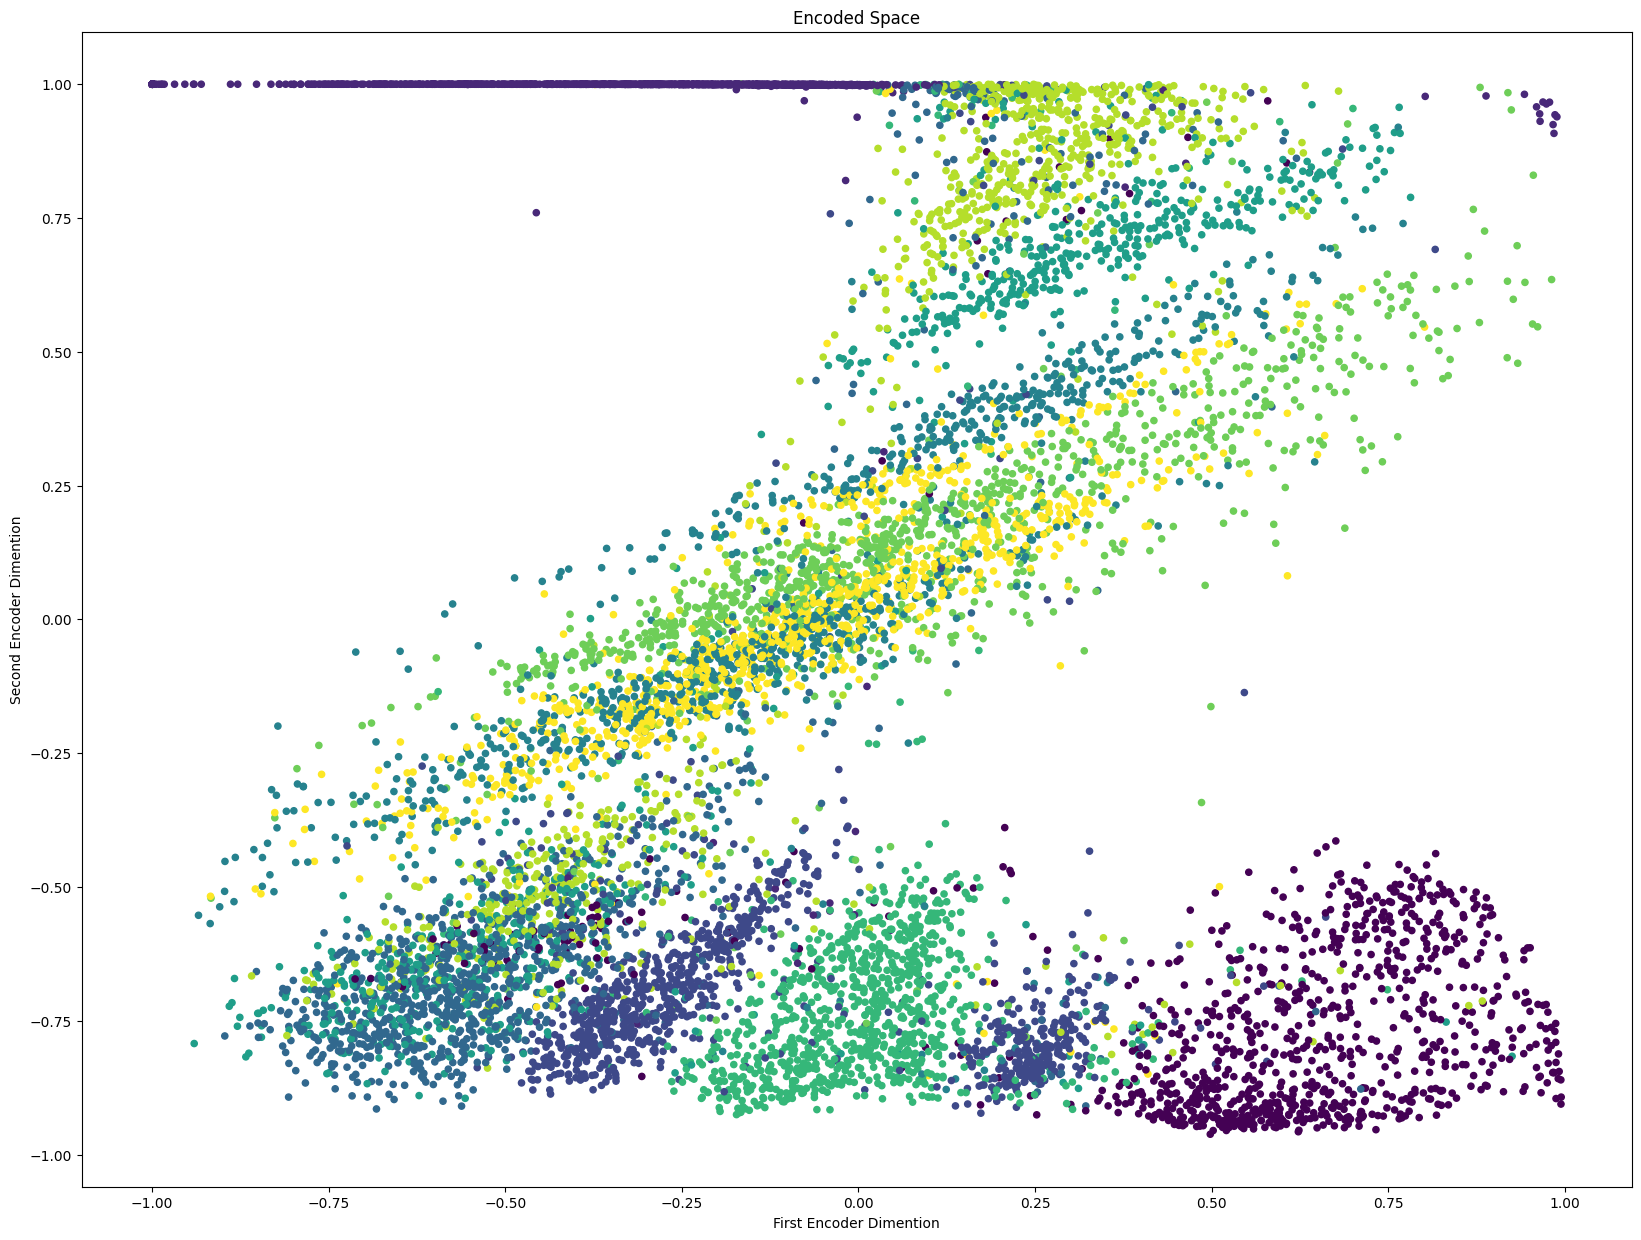

In [78]:
#Visualize latest space
fig=plt.figure(figsize=(20,15))
plt.scatter(encd[:,0],encd[:,1],20,c=ytest[:], cmap='viridis')
plt.title('Encoded Space')
plt.ylabel('Second Encoder Dimention')
plt.xlabel('First Encoder Dimention')
plt.show()

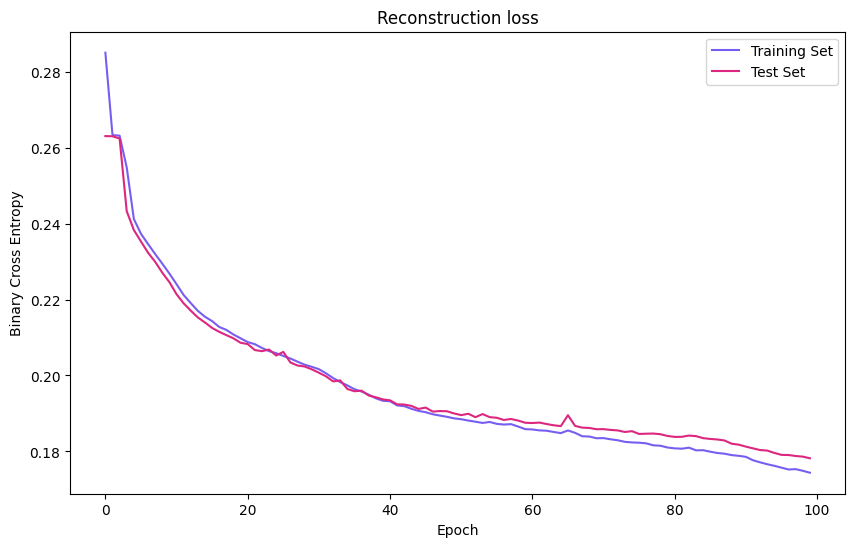

In [79]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [80]:
reconstructed=autoencoder.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


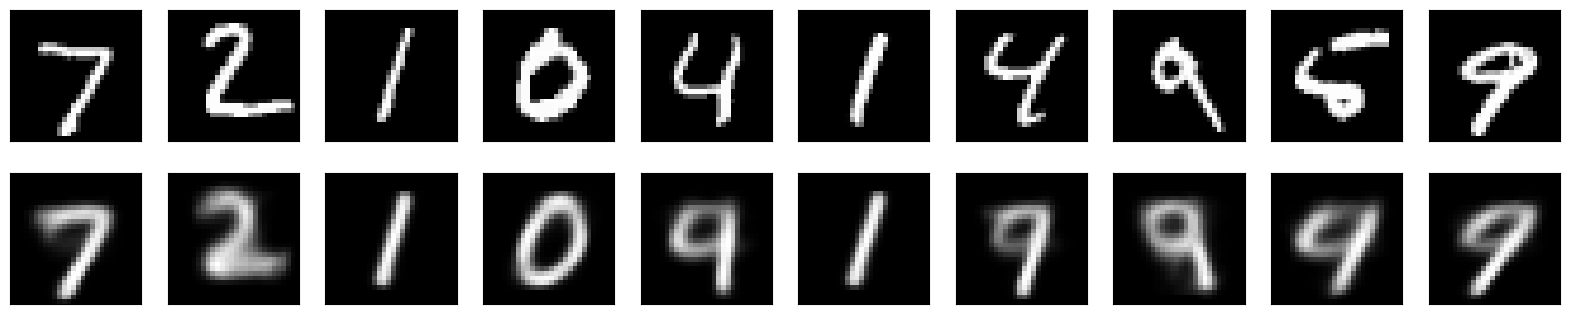

In [81]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()